<a href="https://colab.research.google.com/github/anteaterst/Data_analytics-1109-1209/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
raw_data = pd.read_excel("titanic.xls")
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
raw_data.info

<bound method DataFrame.info of       pclass  survived  ...   body                        home.dest
0          1         1  ...    NaN                     St Louis, MO
1          1         1  ...    NaN  Montreal, PQ / Chesterville, ON
2          1         0  ...    NaN  Montreal, PQ / Chesterville, ON
3          1         0  ...  135.0  Montreal, PQ / Chesterville, ON
4          1         0  ...    NaN  Montreal, PQ / Chesterville, ON
...      ...       ...  ...    ...                              ...
1304       3         0  ...  328.0                              NaN
1305       3         0  ...    NaN                              NaN
1306       3         0  ...  304.0                              NaN
1307       3         0  ...    NaN                              NaN
1308       3         0  ...    NaN                              NaN

[1309 rows x 14 columns]>

In [ ]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


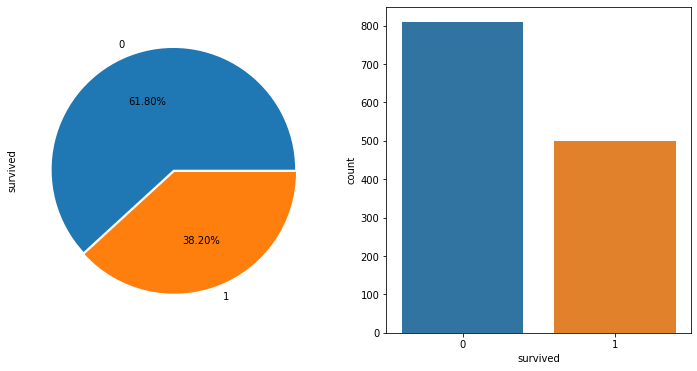

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], explode=[0,0.02])

sns.countplot('survived', data=raw_data, ax=ax[1])




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


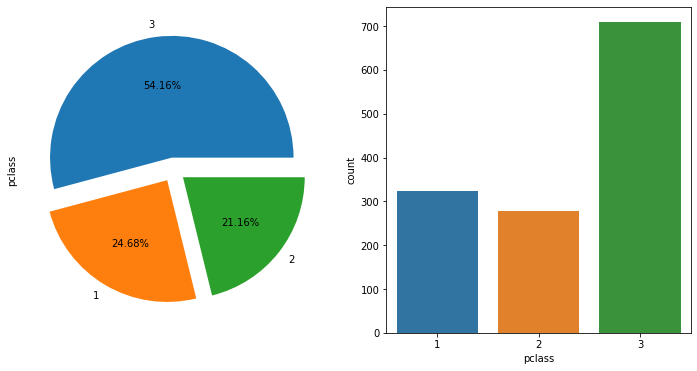

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12,6))

raw_data['pclass'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%', ax=ax[0])

sns.countplot('pclass', data=raw_data, ax=ax[1])


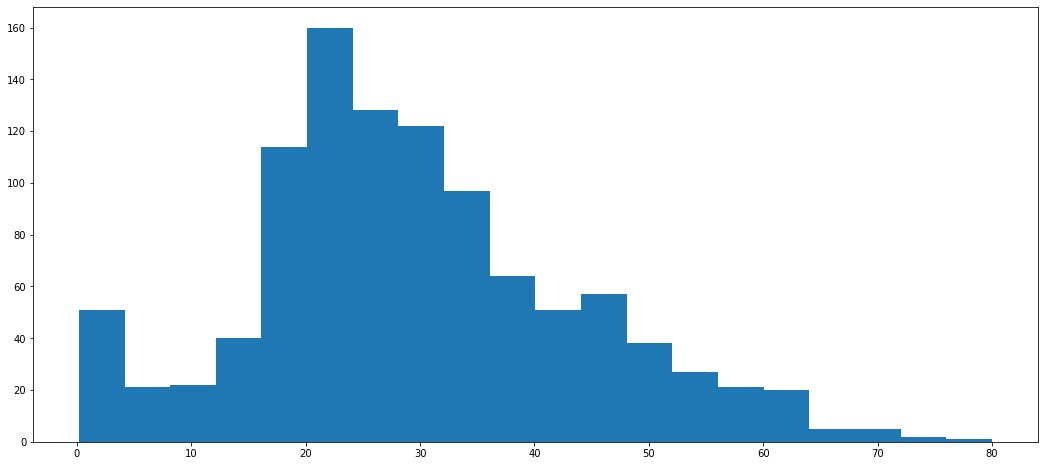

In [ ]:
raw_data['age'].hist(bins=20,figsize =(18,8), grid=False);

## grid 는 격자 관련 

In [ ]:
raw_data.groupby('pclass').mean()

# 지정된 컬럼 index로 데이터를 재정렬 한다.

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [ ]:
raw_data.corr()
# corr()함수는 상관계수를 계산해주는 함수


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


Text(0.5, 1.0, 'Correlation between features')

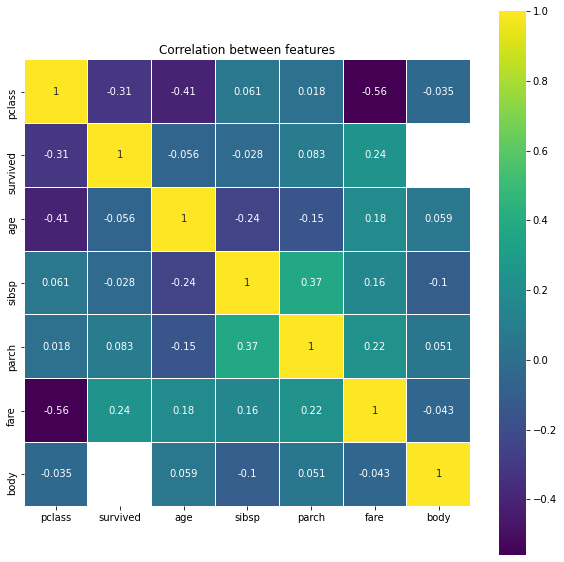

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(raw_data.corr(),linewidths=0.01, square=True, annot=True ,cmap=plt.cm.viridis )
plt.title('Correlation between features')

# 상관계수는 두 데이터 사이의 상관 관계만 확인한다. 
# 인과관계로 해석은 절대 X 
# 선실등급(pclass)이 낮을 수록 생존률(survivied)이 높아지는 관계가 있다는 것과
# 선실 등급이 낮을수록 탑승객의 나이가 많아진다는 것을 알 수 있었다.

In [ ]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins=[0, 3, 7, 15, 30, 60, 100],
                             labels = ['baby','children','teenage','young','adult','old'])

0         young
1          baby
2          baby
3         young
4         young
         ...   
1304    teenage
1305        NaN
1306      young
1307      young
1308      young
Name: age_cat, Length: 1309, dtype: category
Categories (6, object): ['baby' < 'children' < 'teenage' < 'young' < 'adult' < 'old']

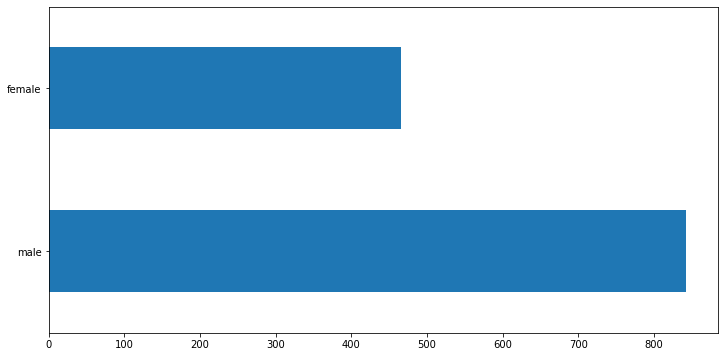

In [ ]:
f, ax = plt.subplots(1,1,figsize=(12,6))

raw_data['sex'].value_counts().plot.barh()